In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
wolne = ['książka', 'książka', 'książka', 'książka', 'telewizja', 'książka', 'telewizja', 'telewizja', 'książka', 
         'książka', 'telewizja', 'telewizja', 'telewizja', 'książka', 'telewizja', 'telewizja', 'telewizja', 'książka', 
         'książka', 'telewizja']
napój = ['herbata', 'kawa', 'kawa', 'herbata', 'kawa', 'kawa', 'herbata', 'kawa', 'kawa', 'herbata', 'herbata', 
         'herbata', 'kawa', 'kawa', 'herbata', 'kawa', 'herbata', 'herbata', 'herbata', 'kawa']
wyjście = ['teatr', 'teatr', 'kino', 'kino', 'teatr', 'kino', 'kino', 'teatr', 'kino', 'kino', 'kino', 'teatr', 'teatr',
           'teatr', 'kino', 'kino', 'teatr', 'teatr', 'teatr', 'teatr']
po_roku = ['Tak', 'Nie', 'Tak', 'Tak', 'Nie', 'Tak', 'Nie', 'Tak', 'Nie', 'Tak', 'Nie', 'Nie', 'Nie', 'Tak', 'Nie', 
           'Nie', 'Tak', 'Nie', 'Nie', 'Tak']

In [4]:
prenumeratorzy = pd.DataFrame({"wolne": wolne, "napój": napój, "wyjście": wyjście, "po_roku":po_roku})

In [5]:
prenumeratorzy

,wolne,napój,wyjście,po_roku
0,książka,herbata,teatr,Tak
1,książka,kawa,teatr,Nie
2,książka,kawa,kino,Tak
3,książka,herbata,kino,Tak
4,telewizja,kawa,teatr,Nie
5,książka,kawa,kino,Tak
6,telewizja,herbata,kino,Nie
7,telewizja,kawa,teatr,Tak
8,książka,kawa,kino,Nie
9,książka,herbata,kino,Tak


In [6]:
import pylab

In [7]:
import numpy as np

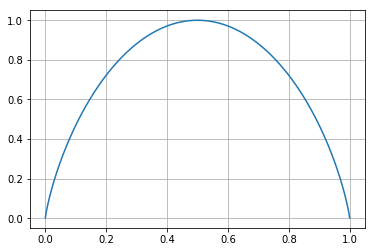

In [8]:

import pylab
import numpy as np

x = np.linspace(0.0001,0.9999,1000) # 1000 punktów
y = -x * np.log2(x) - (1-x) * np.log2(1-x) # wyznaczenie wartości entropii

# wykres
pylab.plot(x,y)
pylab.grid()
pylab.show()

In [9]:
for counter, value in enumerate(prenumeratorzy):
    print(counter, value)

0 wolne
1 napój
2 wyjście
3 po_roku


In [10]:
P_Tak=len(prenumeratorzy[prenumeratorzy["po_roku"]=="Tak"]) / len(prenumeratorzy)

In [11]:
P_Tak

0.45

In [12]:
P_Nie=len(prenumeratorzy[prenumeratorzy["po_roku"]=="Nie"]) / len(prenumeratorzy)

In [13]:
P_Nie

0.55

In [14]:
H_calosc= -P_Tak*np.log2(P_Tak)-P_Nie*np.log2(P_Nie)

In [15]:
H_calosc

0.9927744539878083

Podział po czasie wolnym

In [16]:
prenumeratorzy_książka = prenumeratorzy[prenumeratorzy["wolne"] == "książka"]
prenumeratorzy_telewizja = prenumeratorzy[prenumeratorzy["wolne"] == "telewizja"]

In [17]:
P_Tak_książka = len(prenumeratorzy_książka[prenumeratorzy_książka["po_roku"] == "Tak"]) / len(prenumeratorzy_książka)
P_Nie_książka = len(prenumeratorzy_książka[prenumeratorzy_książka["po_roku"] == "Nie"]) / len(prenumeratorzy_książka)
H_książka = -P_Tak_książka * np.log2(P_Tak_książka) - P_Nie_książka * np.log2(P_Nie_książka)

In [18]:
H_książka

0.9709505944546686

Definicja funkcji

In [19]:

def obliczenie_entropii(data_frame):
    p_tak = len(data_frame[data_frame["po_roku"] == "Tak"]) / len(data_frame)
    p_nie = 1 - p_tak
    H = -p_tak * np.log2(p_tak) - p_nie * np.log2(p_nie)
    return H

In [20]:
H_telewizja=obliczenie_entropii(prenumeratorzy_telewizja)

In [21]:
H_telewizja

0.8812908992306927

Podzial po napojach

In [22]:
prenumeratorzy_kawa = prenumeratorzy[prenumeratorzy["napój"] == "kawa"]
prenumeratorzy_herbata = prenumeratorzy[prenumeratorzy["napój"] == "herbata"]

In [23]:
prenumeratorzy_kawa = prenumeratorzy[prenumeratorzy["napój"] == "kawa"]
prenumeratorzy_herbata = prenumeratorzy[prenumeratorzy["napój"] == "herbata"]

In [24]:
H_kawa=obliczenie_entropii(prenumeratorzy_kawa)

In [25]:
prenumeratorzy_kawa

,wolne,napój,wyjście,po_roku
1,książka,kawa,teatr,Nie
2,książka,kawa,kino,Tak
4,telewizja,kawa,teatr,Nie
5,książka,kawa,kino,Tak
7,telewizja,kawa,teatr,Tak
8,książka,kawa,kino,Nie
12,telewizja,kawa,teatr,Nie
13,książka,kawa,teatr,Tak
15,telewizja,kawa,kino,Nie
19,telewizja,kawa,teatr,Tak


In [26]:
H_herbata=obliczenie_entropii(prenumeratorzy_herbata)

In [27]:
H_herbata, H_kawa

(0.9709505944546686, 1.0)

In [28]:
H_kino = obliczenie_entropii(prenumeratorzy[prenumeratorzy["wyjście"] == "kino"])
H_teatr = obliczenie_entropii(prenumeratorzy[prenumeratorzy["wyjście"] == "teatr"])
print(H_kino, H_teatr)

0.9910760598382222 0.9940302114769565


In [29]:
H_calosc, H_herbata, H_kawa, H_kino, H_teatr, H_książka, H_telewizja

(0.9927744539878083,
 0.9709505944546686,
 1.0,
 0.9910760598382222,
 0.9940302114769565,
 0.9709505944546686,
 0.8812908992306927)

In [30]:
prenumeratorzy['wolne'].value_counts()

telewizja    10
książka      10
Name: wolne, dtype: int64

In [31]:
P_ksiazka, P_telewizja = prenumeratorzy["wolne"].value_counts(normalize=True) #liczba wystąpień danej wartości względem wszystkich wystąpień

In [32]:
P_ksiazka, P_telewizja 

(0.5, 0.5)

In [33]:
PI_wolne= H_calosc - P_ksiazka *H_książka- P_telewizja*H_telewizja #przyrost informacji
PI_wolne

0.06665370714512764

In [34]:
P_kawa = prenumeratorzy["napój"].value_counts(normalize = True)["kawa"]
P_herbata = prenumeratorzy["napój"].value_counts(normalize = True)["herbata"]
P_kawa, P_herbata

(0.5, 0.5)

In [35]:
PI_napoj = H_calosc - P_kawa * H_kawa - P_herbata * H_herbata #przyrost informacji
PI_napoj

0.00729915676047399

In [36]:
P_kino = prenumeratorzy["wyjście"].value_counts(normalize = True)["kino"]
P_teatr = prenumeratorzy["wyjście"].value_counts(normalize = True)["teatr"]
P_kino, P_teatr

(0.45, 0.55)

In [37]:
PI_wyjscie = H_calosc - P_kino * H_kino - P_teatr * H_teatr #przyrost informacji
PI_wyjscie

7.361074828204917e-05

In [38]:
PI_wolne, PI_napoj,  PI_wyjscie

(0.06665370714512764, 0.00729915676047399, 7.361074828204917e-05)

In [39]:
#czyli wolne to najważniejsze kryterium!!!

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
prenumeratorzy.head()

,wolne,napój,wyjście,po_roku
0,książka,herbata,teatr,Tak
1,książka,kawa,teatr,Nie
2,książka,kawa,kino,Tak
3,książka,herbata,kino,Tak
4,telewizja,kawa,teatr,Nie


In [42]:
prenumeratorzy["wolne"], wolne_kody = pd.factorize(prenumeratorzy["wolne"])
prenumeratorzy["napój"], napój_kody = pd.factorize(prenumeratorzy["napój"])
prenumeratorzy["wyjście"], wyjście_kody = pd.factorize(prenumeratorzy["wyjście"])
prenumeratorzy["po_roku"], po_roku_kody = pd.factorize(prenumeratorzy["po_roku"])

In [43]:
prenumeratorzy.head()

,wolne,napój,wyjście,po_roku
0,0,0,0,0
1,0,1,0,1
2,0,1,1,0
3,0,0,1,0
4,1,1,0,1


In [44]:
wolne_kody, napój_kody, wyjście_kody, po_roku_kody

(Index(['książka', 'telewizja'], dtype='object'),
 Index(['herbata', 'kawa'], dtype='object'),
 Index(['teatr', 'kino'], dtype='object'),
 Index(['Tak', 'Nie'], dtype='object'))

In [52]:
X = prenumeratorzy.drop(["po_roku"], axis=1)


In [47]:
Y = prenumeratorzy['po_roku']

In [53]:
X

(    wolne  napój  wyjście
 0       0      0        0
 1       0      1        0
 2       0      1        1
 3       0      0        1
 4       1      1        0
 5       0      1        1
 6       1      0        1
 7       1      1        0
 8       0      1        1
 9       0      0        1
 10      1      0        1
 11      1      0        0
 12      1      1        0
 13      0      1        0
 14      1      0        1
 15      1      1        1
 16      1      0        0
 17      0      0        0
 18      0      0        0
 19      1      1        0, 0     0
 1     1
 2     0
 3     0
 4     1
 5     0
 6     1
 7     0
 8     1
 9     0
 10    1
 11    1
 12    1
 13    0
 14    1
 15    1
 16    0
 17    1
 18    1
 19    0
 Name: po_roku, dtype: int64)

In [54]:
Y

0     0
1     1
2     0
3     0
4     1
5     0
6     1
7     0
8     1
9     0
10    1
11    1
12    1
13    0
14    1
15    1
16    0
17    1
18    1
19    0
Name: po_roku, dtype: int64

In [56]:
klasyfikator = DecisionTreeClassifier(criterion='entropy',max_depth=2)

In [67]:
klasyfikator.fit(X=X,y=Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [61]:
import graphviz
from sklearn import tree

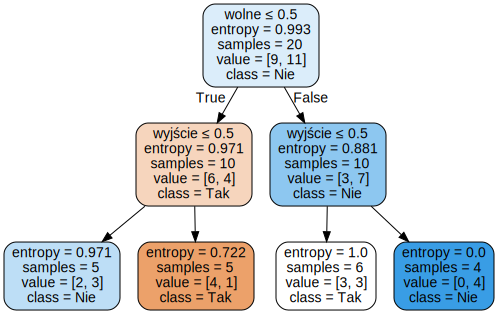

In [77]:
drzewo = tree.export_graphviz(klasyfikator, out_file=None, 
                         feature_names=X.columns,  
                         class_names=po_roku_kody,  
                         filled=True, rounded=True,  
                         special_characters=True)
graf = graphviz.Source(drzewo)
graf

In [80]:
klasyfikator.score(X,Y)

0.7